In [2]:
    !pip install pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 47.8 MB/s eta 0:00:0000:0100:01


The following project analyzes CO2 and Greenhouse Gasses emissions tracked throughout the years. The analysis is done from the perspective of a climate activist, seeking to influece policy. My primary research questions are the following: 1) Which countries tend to contribute the most to global emissions? 2) Which sources tend to contribute the most to emissions?

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt
import pycountry
import seaborn as sns

/kaggle/input/owid-co2/owid-co2-data.csv


In [4]:
df = pd.read_csv("/kaggle/input/owid-co2/owid-co2-data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50191 entries, 0 to 50190
Data columns (total 79 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    50191 non-null  object 
 1   year                                       50191 non-null  int64  
 2   iso_code                                   42262 non-null  object 
 3   population                                 41019 non-null  float64
 4   gdp                                        15251 non-null  float64
 5   cement_co2                                 28863 non-null  float64
 6   cement_co2_per_capita                      25358 non-null  float64
 7   co2                                        29137 non-null  float64
 8   co2_growth_abs                             26981 non-null  float64
 9   co2_growth_prct                            26002 non-null  float64
 10  co2_including_luc     

In [5]:
df.shape

(50191, 79)

In [6]:
df.columns

Index(['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
       'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct',
       'co2_including_luc', 'co2_including_luc_growth_abs',
       'co2_including_luc_growth_prct', 'co2_including_luc_per_capita',
       'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2',
       'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_co2_including_luc', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
       'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
       'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
       'land_use_change_co2', 'land_use_chang

I noticed that in the 'country' column that were entries that weren't countries at all, thus irrelevat and I decided to drop them.

In [7]:
country_names = df['country'].value_counts().sort_values(ascending = True)
print(country_names)

country
Kuwaiti Oil Fires (GCP)     31
International transport     34
Ryukyu Islands (GCP)        51
Kosovo                     173
Bermuda                    173
                          ... 
Sierra Leone               274
Singapore                  274
South America              274
Cyprus                     274
Afghanistan                274
Name: count, Length: 255, dtype: int64


In [8]:
# Get official ISO country names
valid_countries = {country.name for country in pycountry.countries}

# Also include common alternative spellings if needed
valid_countries.update(["South Korea", "North Korea", "Russia", "Vietnam", "Syria", "Bolivia"])
# Keep only rows where 'country' matches a valid ISO name
df = df[df['country'].isin(valid_countries)]
# See which names didn’t match
invalid_entries = set(df['country']) - valid_countries
print(invalid_entries)


set()


In [9]:
country_names = df['country'].value_counts().sort_values(ascending = True)
print(country_names)

country
Saint Pierre and Miquelon    173
French Polynesia             173
Bermuda                      173
Christmas Island             173
New Caledonia                173
                            ... 
Tunisia                      274
Singapore                    274
Sierra Leone                 274
Norway                       274
Afghanistan                  274
Name: count, Length: 199, dtype: int64


I decided to drop columns with comulative values because later I delete columns of year before 1957, making the data irrelevant as I will later calculate comulative values from this year forward:

In [10]:
df = df.drop(columns=['cumulative_cement_co2', 'cumulative_co2',
       'cumulative_co2_including_luc', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
       'cumulative_oil_co2', 'cumulative_other_co2','share_global_cumulative_cement_co2', 'share_global_cumulative_co2',
       'share_global_cumulative_co2_including_luc',
       'share_global_cumulative_coal_co2',
       'share_global_cumulative_flaring_co2',
       'share_global_cumulative_gas_co2', 'share_global_cumulative_luc_co2',
       'share_global_cumulative_oil_co2', 'share_global_cumulative_other_co2'])
df.columns

Index(['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
       'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct',
       'co2_including_luc', 'co2_including_luc_growth_abs',
       'co2_including_luc_growth_prct', 'co2_including_luc_per_capita',
       'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2',
       'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'energy_per_capita', 'energy_per_gdp',
       'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
       'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
       'land_use_change_co2', 'land_use_change_co2_per_capita', 'methane',
       'methane_per_capita', 'nitrous_oxide', 'nitrous_oxide_per_capita',
       'oil_co2', 'oil_co2_per_capita', 'other_co2_per_capita',
       'other_industry_co2', 'primary_energy_consumption',
       '

In [11]:
df.tail(10)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
50181,Zimbabwe,2014,ZWE,14207367.0,2.381884e+10,0.496,0.035,11.946,0.275,2.354,...,NaN,0.110,0.001,0.001,0.002,0.0,37.165,19.453,0.801,6.704
50182,Zimbabwe,2015,ZWE,14399009.0,2.424616e+10,0.585,0.041,12.017,0.071,0.591,...,NaN,0.109,0.001,0.001,0.002,0.0,37.427,19.386,1.200,9.985
50183,Zimbabwe,2016,ZWE,14600297.0,2.436205e+10,0.461,0.032,10.581,-1.436,-11.948,...,NaN,0.109,0.001,0.001,0.002,0.0,34.763,17.527,1.204,11.382
50184,Zimbabwe,2017,ZWE,14812484.0,2.557601e+10,0.469,0.032,9.827,-0.754,-7.129,...,NaN,0.108,0.001,0.001,0.002,0.0,35.380,17.082,0.138,1.408
50185,Zimbabwe,2018,ZWE,15034457.0,2.678627e+10,0.558,0.037,11.205,1.379,14.030,...,NaN,0.107,0.001,0.001,0.002,0.0,35.722,18.689,-0.252,-2.252
50186,Zimbabwe,2019,ZWE,15271377.0,2.514642e+10,0.473,0.031,10.263,-0.942,-8.411,...,NaN,0.106,0.001,0.001,0.002,0.0,34.348,17.531,-0.027,-0.261
50187,Zimbabwe,2020,ZWE,15526888.0,2.317871e+10,0.496,0.032,8.495,-1.768,-17.231,...,NaN,0.105,0.001,0.001,0.002,0.0,31.323,15.775,0.612,7.209
50188,Zimbabwe,2021,ZWE,15797220.0,2.514009e+10,0.531,0.034,10.204,1.709,20.120,...,NaN,0.104,0.001,0.001,0.002,0.0,33.549,17.599,0.539,5.280
50189,Zimbabwe,2022,ZWE,16069061.0,2.590159e+10,0.531,0.033,10.425,0.221,2.169,...,NaN,0.103,0.001,0.001,0.002,0.0,33.772,17.910,0.315,3.018
50190,Zimbabwe,2023,ZWE,16340829.0,NaN,0.531,0.032,11.164,0.739,7.090,...,NaN,0.102,0.001,0.001,0.002,0.0,33.955,18.608,NaN,NaN


Dropping all entries from before 1958, since historically, levels of greenhouse gasses in the atmosphere only started to measure near the end of 1950s.

In [12]:

df['year'] = pd.to_datetime(df['year'], format = "%Y").dt.year
df = df[df['year'] >= 1958]



In [13]:
print(df.isna().sum())

country                           0
year                              0
iso_code                          0
population                      132
gdp                            3535
                               ... 
temperature_change_from_n2o     858
total_ghg                      1056
total_ghg_excluding_lucf       1122
trade_co2                      9458
trade_co2_share                9458
Length: 61, dtype: int64


In [14]:
df = df.fillna(0)
print(df.isna().sum())

country                        0
year                           0
iso_code                       0
population                     0
gdp                            0
                              ..
temperature_change_from_n2o    0
total_ghg                      0
total_ghg_excluding_lucf       0
trade_co2                      0
trade_co2_share                0
Length: 61, dtype: int64


In [15]:
#df['gdp'] = df['gdp'].astype(int)
#df['population'] = df['population'].astype(int)
df.dtypes

country                         object
year                             int32
iso_code                        object
population                     float64
gdp                            float64
                                ...   
temperature_change_from_n2o    float64
total_ghg                      float64
total_ghg_excluding_lucf       float64
trade_co2                      float64
trade_co2_share                float64
Length: 61, dtype: object

Plotting the increase of CO2 emissions thrughout the years:

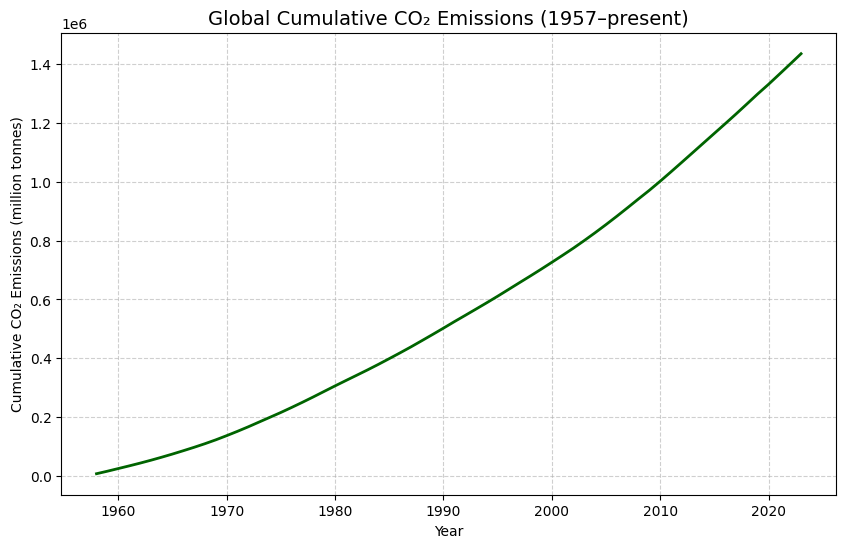

In [16]:
# Sum annual emissions first
annual_emissions = df.groupby("year")["co2"].sum()

# Compute cumulative sum
global_cumulative = annual_emissions.cumsum()

# Plot
plt.figure(figsize=(10,6))
global_cumulative.plot(kind="line", color="darkgreen", linewidth=2)

plt.title("Global Cumulative CO₂ Emissions (1957–present)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Cumulative CO₂ Emissions (million tonnes)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


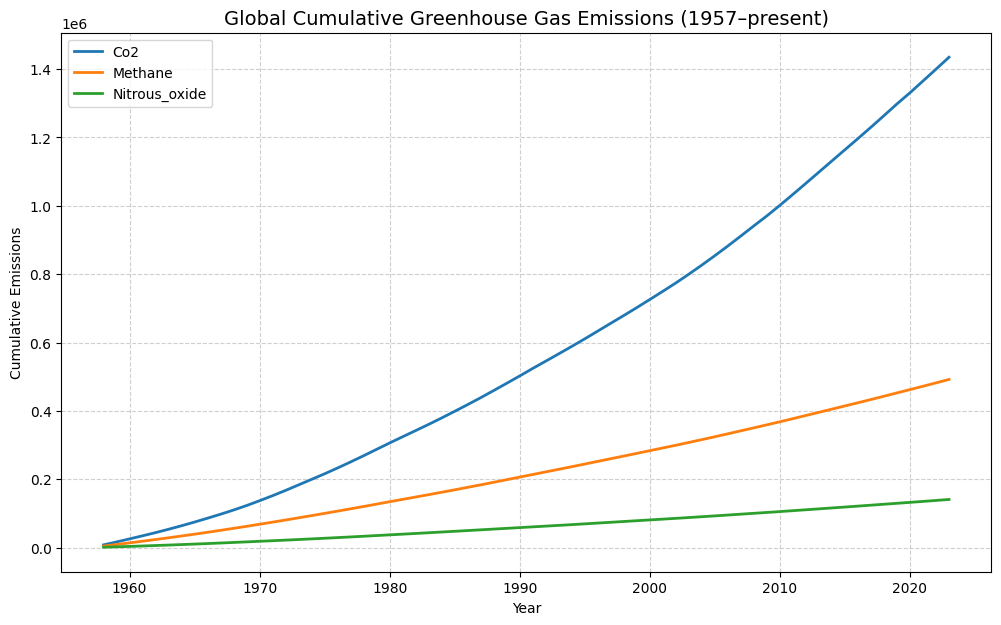

In [17]:


# Select gases of interest
gases = ["co2", "methane", "nitrous_oxide"]

# Dictionary to hold cumulative data
cumulative_gases = {}

for gas in gases:
    # Sum global annual emissions
    annual = df.groupby("year")[gas].sum()
    # Compute cumulative sum
    cumulative_gases[gas] = annual.cumsum()

# Plot
plt.figure(figsize=(12,7))

for gas, series in cumulative_gases.items():
    plt.plot(series.index, series.values, label=gas.capitalize(), linewidth=2)

plt.title("Global Cumulative Greenhouse Gas Emissions (1957–present)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Cumulative Emissions")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


Finding out the top 10 countries with highest share of contribution to GHG emissions in recent years:

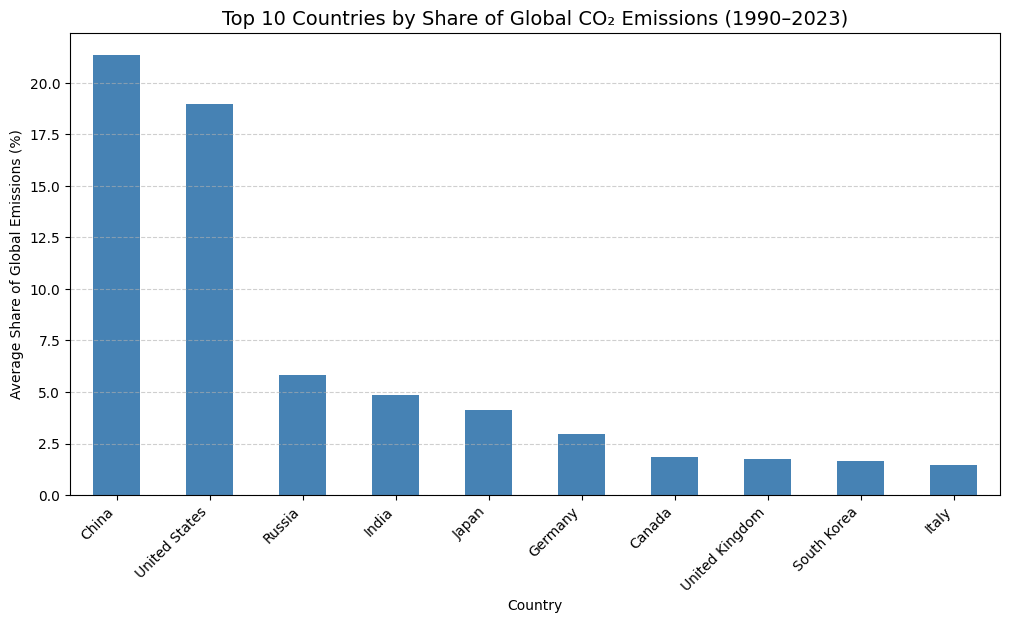

In [18]:


# Filter years
df_period = df[(df["year"] >= 1990)]

# Choose the share column (you can switch to 'share_global_co2_including_luc')
share_col = "share_global_co2"

# Compute average share over the period for each country
country_shares = df_period.groupby("country")[share_col].mean().dropna()

# Get top 10 countries
top_countries = country_shares.sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12,6))
top_countries.plot(kind="bar", color="steelblue")

plt.title("Top 10 Countries by Share of Global CO₂ Emissions (1990–2023)", fontsize=14)
plt.ylabel("Average Share of Global Emissions (%)")
plt.xlabel("Country")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


Analyzing emissions from top contributer: China

In [19]:
country_china = df[df['country'] == 'China']
country_china = country_china.set_index('year')
print(country_china.info())

<class 'pandas.core.frame.DataFrame'>
Index: 66 entries, 1958 to 2023
Data columns (total 60 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   country                               66 non-null     object 
 1   iso_code                              66 non-null     object 
 2   population                            66 non-null     float64
 3   gdp                                   66 non-null     float64
 4   cement_co2                            66 non-null     float64
 5   cement_co2_per_capita                 66 non-null     float64
 6   co2                                   66 non-null     float64
 7   co2_growth_abs                        66 non-null     float64
 8   co2_growth_prct                       66 non-null     float64
 9   co2_including_luc                     66 non-null     float64
 10  co2_including_luc_growth_abs          66 non-null     float64
 11  co2_including_luc_gro

Showing China CO2 emissions metrics over time:

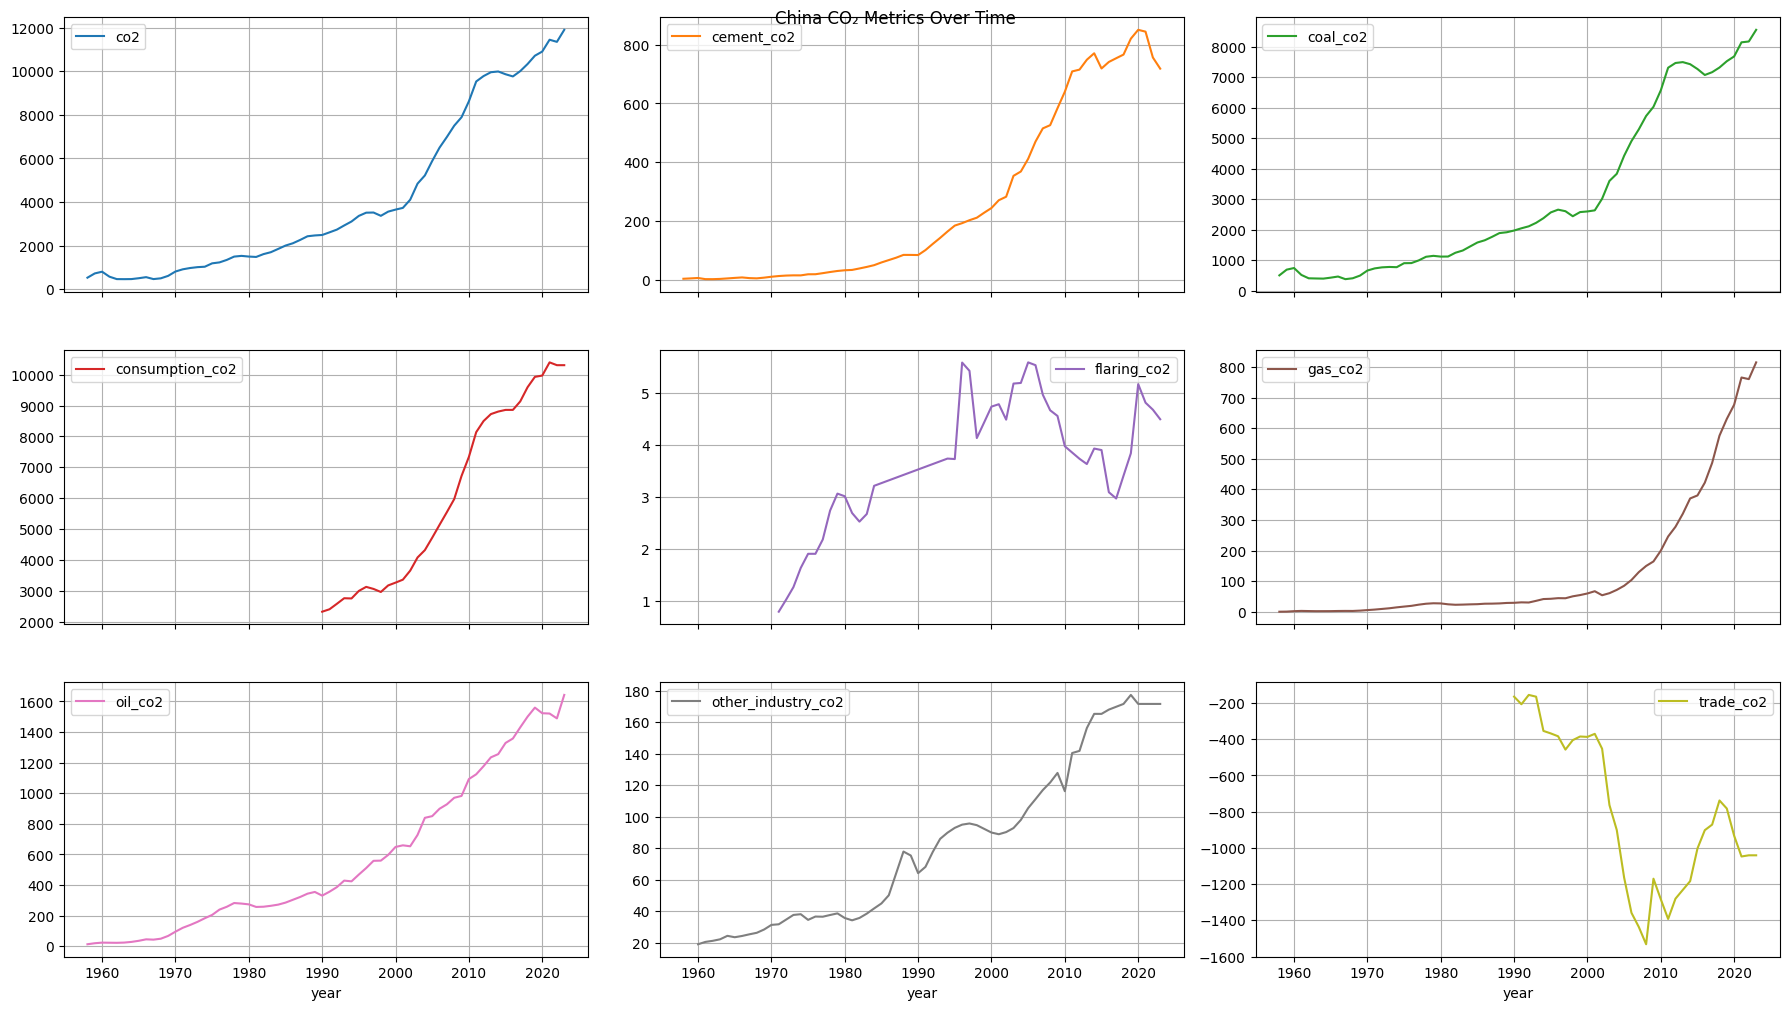

In [20]:


co2_columns = ['co2', 'cement_co2', 'coal_co2', 'consumption_co2', 'flaring_co2', 'gas_co2', 'oil_co2', 'other_industry_co2', 'trade_co2']

#country_china[co2_columns].replace(0, np.nan, inplace=True)
#country_china[co2_columns].interpolate(method='linear', inplace=True)

# Replace 0s with NaNs
country_china.loc[:, co2_columns] = country_china[co2_columns].replace(0, np.nan)

# Interpolate missing values
country_china.loc[:, co2_columns] = country_china[co2_columns].interpolate(method='linear')


country_china[co2_columns].plot(subplots=True, layout=(6, 3), figsize=(18, 20), 
                                    title='China CO₂ Metrics Over Time', grid=True)
plt.tight_layout()
plt.show()



Showing information concenrning China's various CO2 emissions:

<bound method DataFrame.info of                          co2  cement_co2  coal_co2  consumption_co2  \
co2                 1.000000    0.993332  0.998970         0.995256   
cement_co2          0.993332    1.000000  0.992356         0.983142   
coal_co2            0.998970    0.992356  1.000000         0.988247   
consumption_co2     0.995256    0.983142  0.988247         1.000000   
flaring_co2         0.497486    0.499712  0.501446        -0.191350   
gas_co2             0.892088    0.871349  0.875658         0.919404   
oil_co2             0.990906    0.982691  0.985712         0.985512   
other_industry_co2  0.974038    0.966809  0.970956         0.978744   
trade_co2          -0.739151   -0.758516 -0.771129        -0.673413   

                    flaring_co2   gas_co2   oil_co2  other_industry_co2  \
co2                    0.497486  0.892088  0.990906            0.974038   
cement_co2             0.499712  0.871349  0.982691            0.966809   
coal_co2               0.501446 

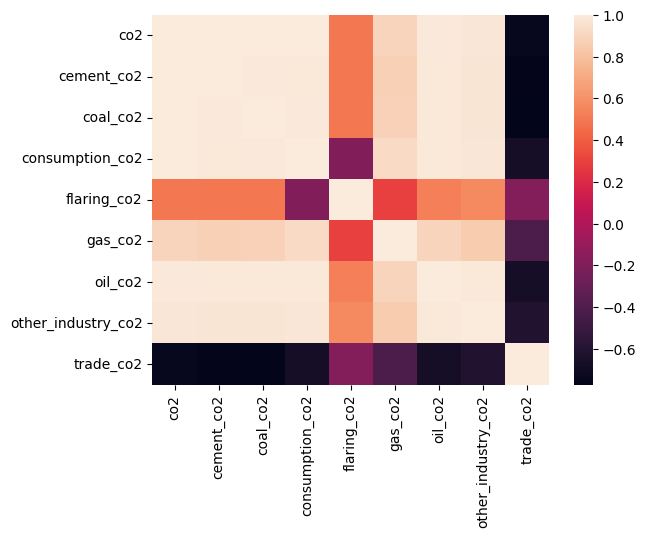

In [21]:
correlation_china = country_china[co2_columns].corr()
print(correlation_china.info)
sns.heatmap(correlation_china)
plt.show()

Sorting china's top five CO2 sources:

In [22]:
sort_corr_c_co2 = correlation_china.unstack().sort_values(ascending=False)
sort_corr_c_co2 = sort_corr_c_co2[sort_corr_c_co2.index.get_level_values(0) != sort_corr_c_co2.index.get_level_values(1)]
sort_corr_c_co2 = sort_corr_c_co2.drop_duplicates()
top_five_co2 = sort_corr_c_co2.head()
print(top_five_co2)

coal_co2         co2           0.998970
consumption_co2  co2           0.995256
co2              cement_co2    0.993332
cement_co2       coal_co2      0.992356
oil_co2          co2           0.990906
dtype: float64


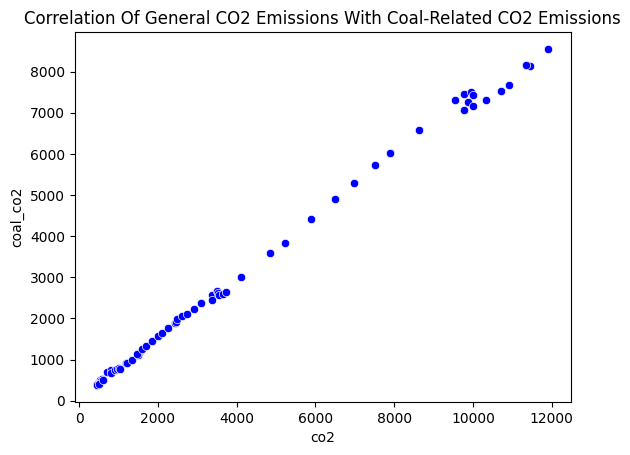

In [23]:
sns.scatterplot(x = 'co2', y = 'coal_co2', color = "blue", data = country_china)
plt.title("Correlation Of General CO2 Emissions With Coal-Related CO2 Emissions")
plt.show()


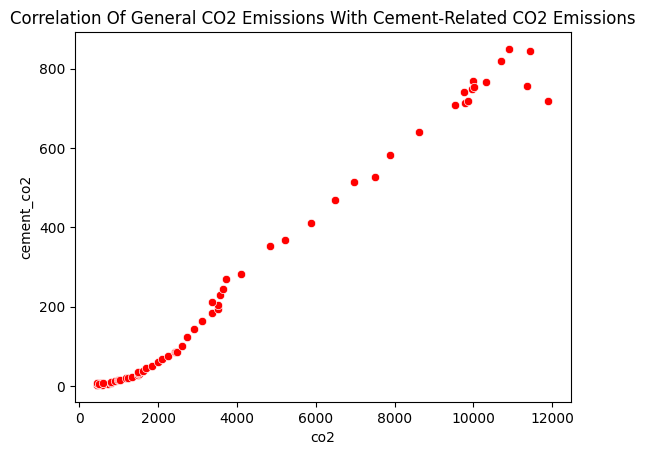

In [24]:
sns.scatterplot(x = 'co2', y = 'cement_co2', color = "red", data = country_china)
plt.title("Correlation Of General CO2 Emissions With Cement-Related CO2 Emissions")
plt.show()

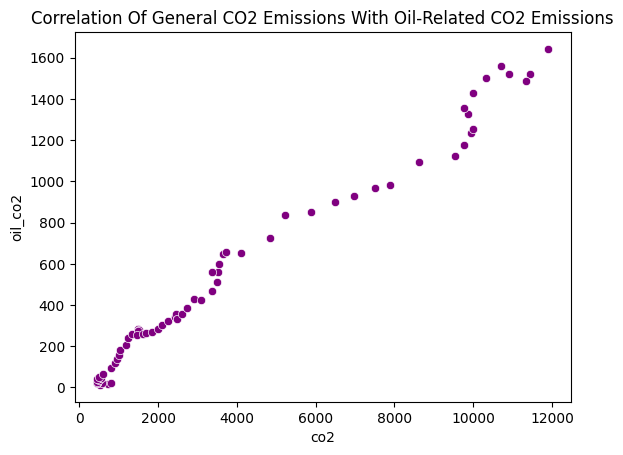

In [25]:
sns.scatterplot(x = 'co2', y = 'oil_co2', color = "purple", data = country_china)
plt.title("Correlation Of General CO2 Emissions With Oil-Related CO2 Emissions")
plt.show()

Analyzing CO2 emission per capita in China:

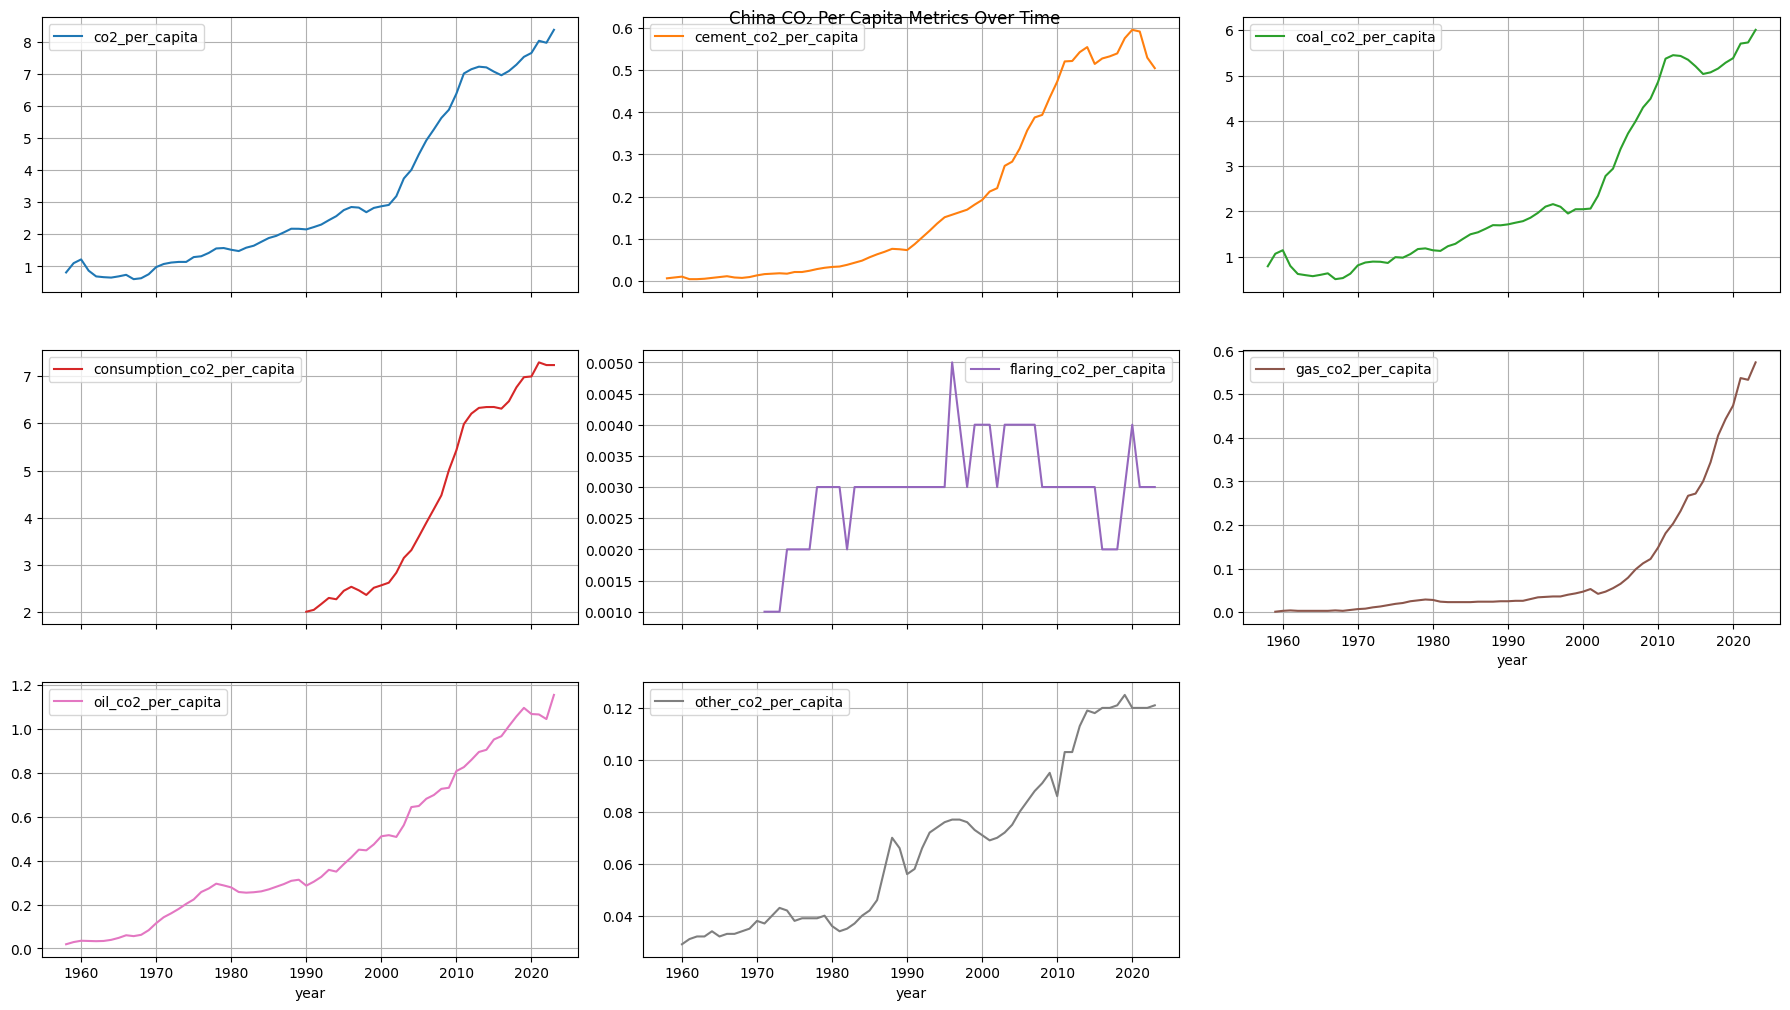

In [26]:
co2_per_capita = ['co2_per_capita', 'cement_co2_per_capita', 'coal_co2_per_capita', 'consumption_co2_per_capita', 'flaring_co2_per_capita', 'gas_co2_per_capita', 'oil_co2_per_capita', 'other_co2_per_capita']

# Replace 0s with NaNs
country_china.loc[:, co2_per_capita] = country_china[co2_per_capita].replace(0, np.nan)

# Interpolate missing values
country_china.loc[:, co2_per_capita] = country_china[co2_per_capita].interpolate(method='linear')

country_china[co2_per_capita].plot(subplots=True, layout=(6, 3), figsize=(18, 20), 
                                    title='China CO₂ Per Capita Metrics Over Time', grid=True)
plt.tight_layout()
plt.show()

Sorting correlations of China's emissions of CO2 per capita:

<bound method DataFrame.info of                             co2_per_capita  cement_co2_per_capita  \
co2_per_capita                    1.000000               0.991989   
cement_co2_per_capita             0.991989               1.000000   
coal_co2_per_capita               0.998578               0.990518   
consumption_co2_per_capita        0.993989               0.978941   
flaring_co2_per_capita            0.197053               0.219554   
gas_co2_per_capita                0.885948               0.857947   
oil_co2_per_capita                0.983872               0.974942   
other_co2_per_capita              0.964666               0.961962   

                            coal_co2_per_capita  consumption_co2_per_capita  \
co2_per_capita                         0.998578                    0.993989   
cement_co2_per_capita                  0.990518                    0.978941   
coal_co2_per_capita                    1.000000                    0.985507   
consumption_co2_per_capita    

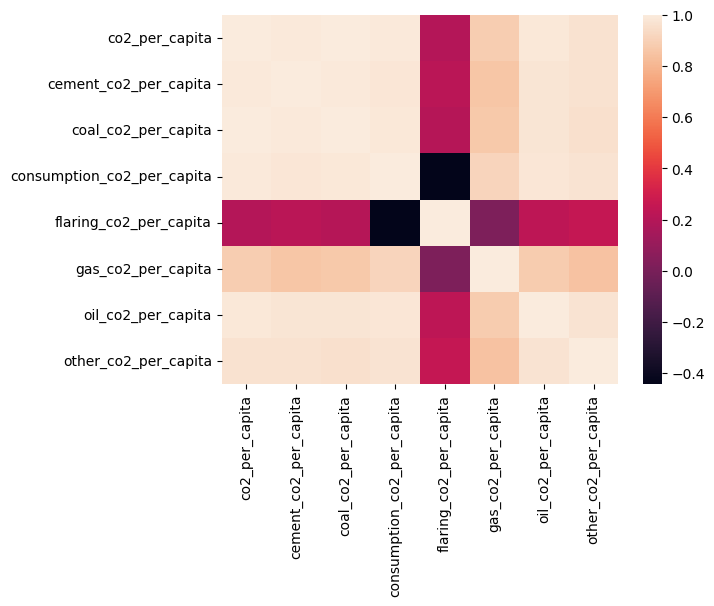

In [27]:
correlation_china = country_china[co2_per_capita].corr()
print(correlation_china.info)
sns.heatmap(correlation_china)
plt.show()

Analyzing emissions from second top contributer: United States

In [28]:
country_us = df[df['country'] == 'United States']
country_us = country_us.set_index('year')
print(country_us.info())

<class 'pandas.core.frame.DataFrame'>
Index: 66 entries, 1958 to 2023
Data columns (total 60 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   country                               66 non-null     object 
 1   iso_code                              66 non-null     object 
 2   population                            66 non-null     float64
 3   gdp                                   66 non-null     float64
 4   cement_co2                            66 non-null     float64
 5   cement_co2_per_capita                 66 non-null     float64
 6   co2                                   66 non-null     float64
 7   co2_growth_abs                        66 non-null     float64
 8   co2_growth_prct                       66 non-null     float64
 9   co2_including_luc                     66 non-null     float64
 10  co2_including_luc_growth_abs          66 non-null     float64
 11  co2_including_luc_gro

Analyzing US's CO2 emissions metrics over time:

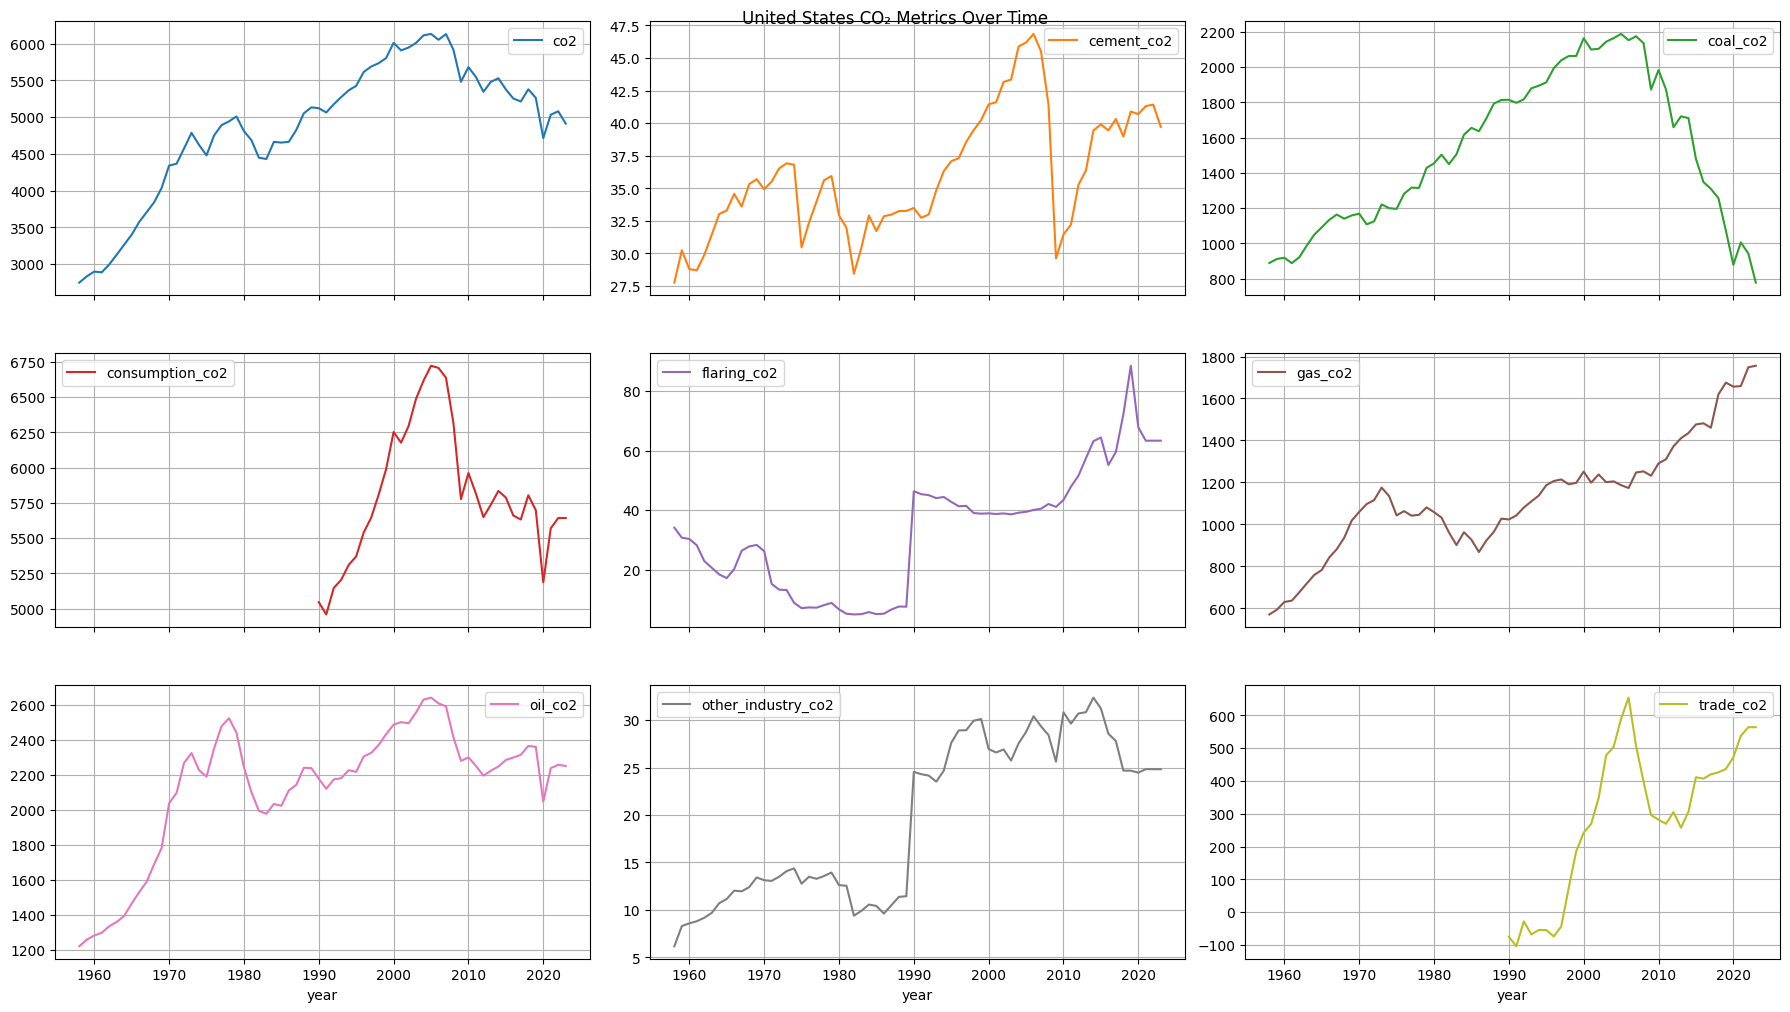

In [37]:

co2_columns = ['co2', 'cement_co2', 'coal_co2', 'consumption_co2', 'flaring_co2', 'gas_co2', 'oil_co2', 'other_industry_co2', 'trade_co2']

# Replace 0s with NaNs
country_us.loc[:, co2_columns] = country_us[co2_columns].replace(0, np.nan)

# Interpolate missing values
country_us.loc[:, co2_columns] = country_us[co2_columns].interpolate(method='linear')

country_us[co2_columns].plot(subplots=True, layout=(6, 3), figsize=(18, 20), 
                                    title='United States CO₂ Metrics Over Time', grid=True)
plt.tight_layout()
plt.show()



Measuring correlations of US CO2 emissions over time:

<bound method DataFrame.info of                          co2  cement_co2  coal_co2  consumption_co2  \
co2                 1.000000    0.703729  0.807464         0.869720   
cement_co2          0.703729    1.000000  0.424747         0.710173   
coal_co2            0.807464    0.424747  1.000000         0.485549   
consumption_co2     0.869720    0.710173  0.485549         1.000000   
flaring_co2         0.391110    0.525226  0.093074        -0.342872   
gas_co2             0.690373    0.664504  0.172588        -0.077767   
oil_co2             0.943715    0.675104  0.658913         0.937945   
other_industry_co2  0.818768    0.700627  0.609140         0.444776   
trade_co2           0.172762    0.648846 -0.330913         0.633314   

                    flaring_co2   gas_co2   oil_co2  other_industry_co2  \
co2                    0.391110  0.690373  0.943715            0.818768   
cement_co2             0.525226  0.664504  0.675104            0.700627   
coal_co2               0.093074 

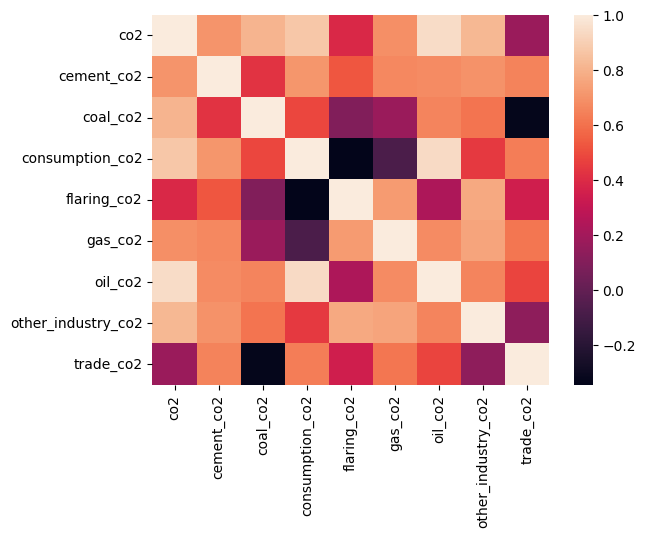

In [38]:
correlation_us = country_us[co2_columns].corr()
print(correlation_us.info)
sns.heatmap(correlation_us)
plt.show()

Sorting top five correlations of CO2 emissions in the US:

In [39]:
sort_corr_us_co2 = correlation_us.unstack().sort_values(ascending=False)
sort_corr_us_co2 = sort_corr_us_co2[sort_corr_us_co2.index.get_level_values(0) != sort_corr_us_co2.index.get_level_values(1)]
sort_corr_us_co2 = sort_corr_us_co2.drop_duplicates()
top_five_co2 = sort_corr_us_co2.head()
print(top_five_co2)

co2                 oil_co2            0.943715
oil_co2             consumption_co2    0.937945
co2                 consumption_co2    0.869720
other_industry_co2  co2                0.818768
coal_co2            co2                0.807464
dtype: float64


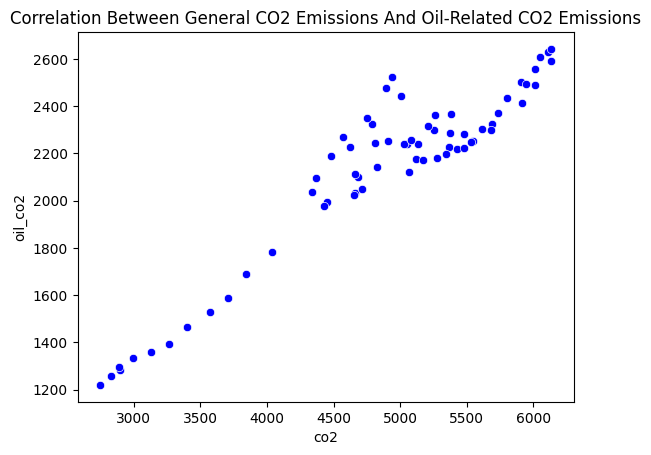

In [41]:
sns.scatterplot(x='co2', y='oil_co2',color = 'blue', data=country_us)
plt.title("Correlation Between General CO2 Emissions And Oil-Related CO2 Emissions")
plt.show()

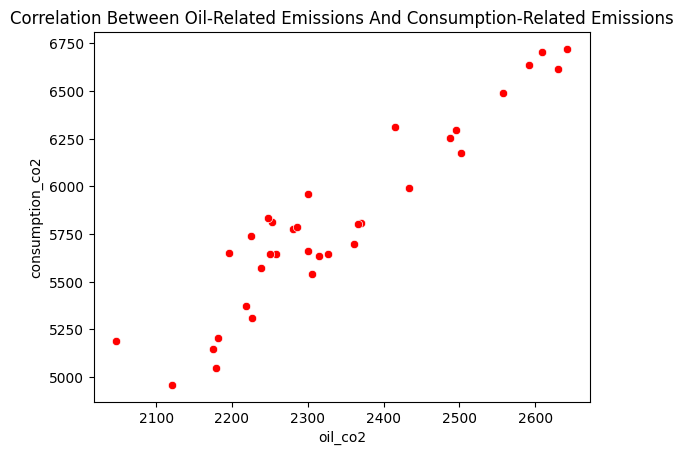

In [42]:
sns.scatterplot(x='oil_co2',y='consumption_co2',color='red', data=country_us)
plt.title("Correlation Between Oil-Related Emissions And Consumption-Related Emissions")
plt.show()

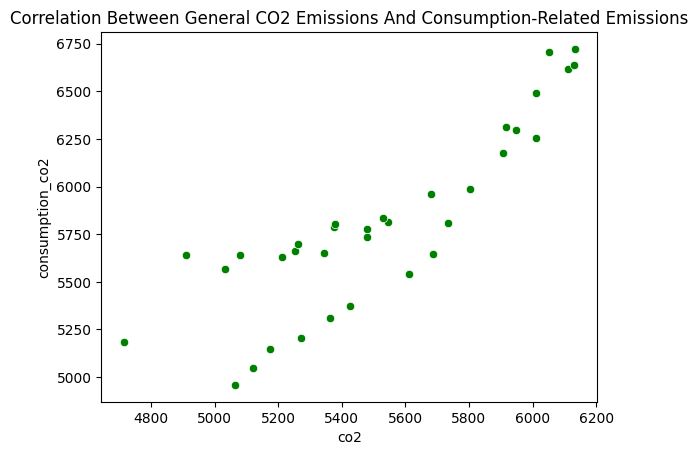

In [43]:
sns.scatterplot(x='co2', y='consumption_co2',color='green', data=country_us)
plt.title("Correlation Between General CO2 Emissions And Consumption-Related Emissions")
plt.show()

Plotting US's CO2 emissions per capita:

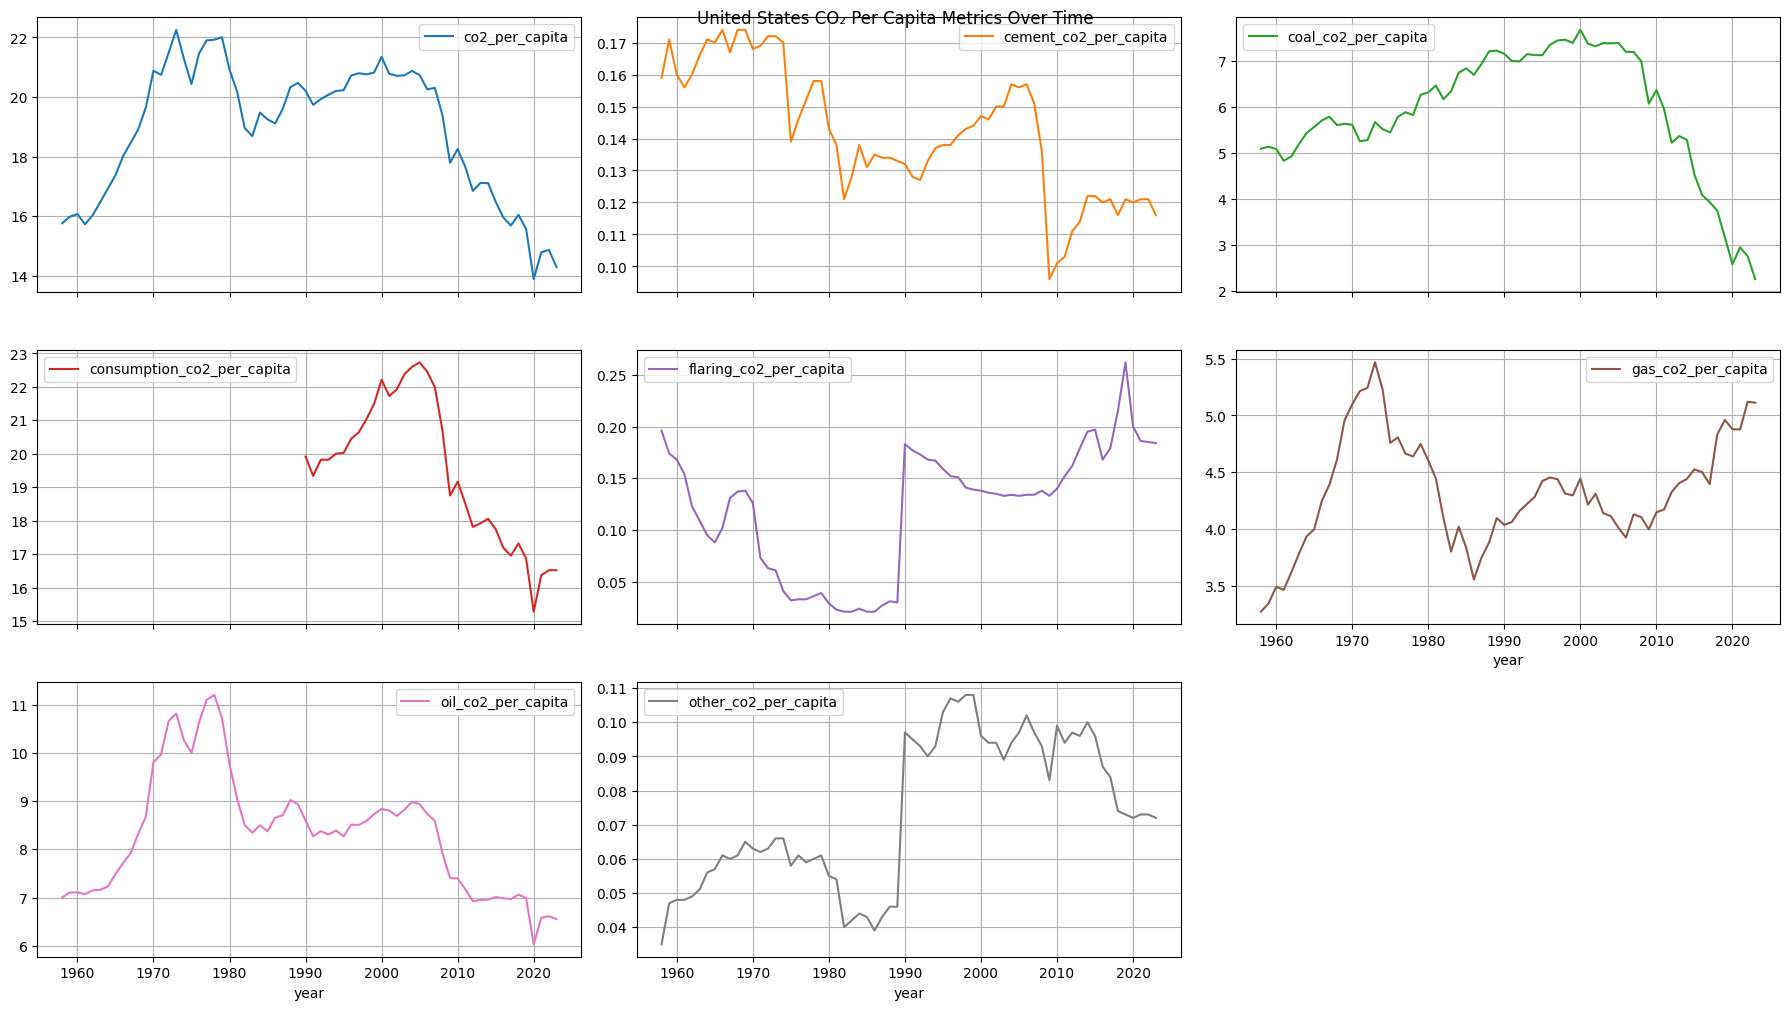

In [44]:
# Replace 0s with NaNs
country_us.loc[:, co2_per_capita] = country_us[co2_per_capita].replace(0, np.nan)

# Interpolate missing values
country_us.loc[:, co2_per_capita] = country_us[co2_per_capita].interpolate(method='linear')

country_us[co2_per_capita].plot(subplots=True, layout=(6, 3), figsize=(18, 20), 
                                    title='United States CO₂ Per Capita Metrics Over Time', grid=True)
plt.tight_layout()
plt.show()

<bound method DataFrame.info of                             co2_per_capita  cement_co2_per_capita  \
co2_per_capita                    1.000000               0.354403   
cement_co2_per_capita             0.354403               1.000000   
coal_co2_per_capita               0.782809               0.171612   
consumption_co2_per_capita        0.945650               0.812429   
flaring_co2_per_capita           -0.563287              -0.288156   
gas_co2_per_capita                0.182866               0.016469   
oil_co2_per_capita                0.906700               0.451236   
other_co2_per_capita              0.154947              -0.329874   

                            coal_co2_per_capita  consumption_co2_per_capita  \
co2_per_capita                         0.782809                    0.945650   
cement_co2_per_capita                  0.171612                    0.812429   
coal_co2_per_capita                    1.000000                    0.913570   
consumption_co2_per_capita    

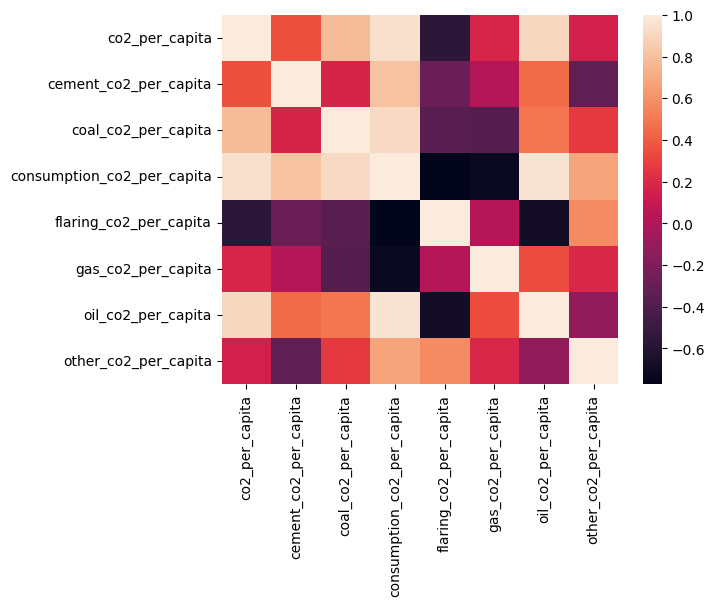

In [45]:
correlation_us = country_us[co2_per_capita].corr()
print(correlation_us.info)
sns.heatmap(correlation_us)
plt.show()

When I compared between US and China, it's shown that for the US, emission are in decline, while for China, emissions are increasing. 
Emissions originated from cement, coal and oil seems to be highly correlated with overall increase in CO2 emissions for China.
As for the US, overall CO2 emissions seems to be highly correlated with Oil and Consumption (Primary energy consumption - Measured in terawatt-hours) emissions, while Oil and Consumption emissions seems to be highly correlated with each over.